In [1]:
# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)

# desiable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

# set the ANS baroreflex parameters
models["Ans"].heart_rate_ref = 140.0
models["Ans"].min_baro = 20.0
models["Ans"].set_baro = 57.5
models["Ans"].max_baro = 110.0
# maximum effect on heart rate with hypotension = (min - set) * gain = (20 - 57.5) * -1.48 = 55.5 + ref = max hr 195.5
# maximum effect on heart rate with hypertension = (max - set) * gain = (110 - 57.5) * -1.48 = -48.1 + ref = min hr 62.
models["Ans"].g_map_hp = -1.48              
models["Ans"].tc_map_hp = 2.0
# maximum effect is 50% volume change of the venous reservoirs IVCE and SVC
# maximum effect on venpool with hypotension = (min - set) = -37.5 -> u_vol smaller by 50% = -0.5 -> gain 0.0133
# maximum effect on venpool with hypertension = (max - set) = 37.5 -> u_vol larger by 50% = 0.5   -> gain 0.0133
models["Ans"].g_map_ven_pool = 0.0 #0.0133           
models["Ans"].tc_map_ven_pool = 30.0
# maximum effect is 50% contractility change of the heart (no effect on relaxation) 
# maximum effect on contracility with hypotension = (min - set) = -37.5 -> contractility larger by 20% = 0.5 -> gain -0.005
# maximum effect on contracility with hypertension = (min - set) = 37.5 -> contractility smaller by 20% = -0.5 -> gain -0.005
models["Ans"].g_map_cont = 0.0 #-0.005       
models["Ans"].tc_map_cont = 10.0
# maximum effect is 50% vasoconstriction
# maximum effect on contracility with hypotension = (min - set) = -37.5 -> elastance larger by 20% = 0.5 -> gain -0.005
# maximum effect on contracility with hypertension = (min - set) = 37.5 -> elastance smaller by 20% = -0.5 -> gain -0.005
models["Ans"].g_map_svr =0.0 #-0.5       
models["Ans"].tc_map_svr = 10.0


# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
#neo.calculate(60)
# 51/34 1600e

 Model 'normal neonate' loaded and initialized correctly.


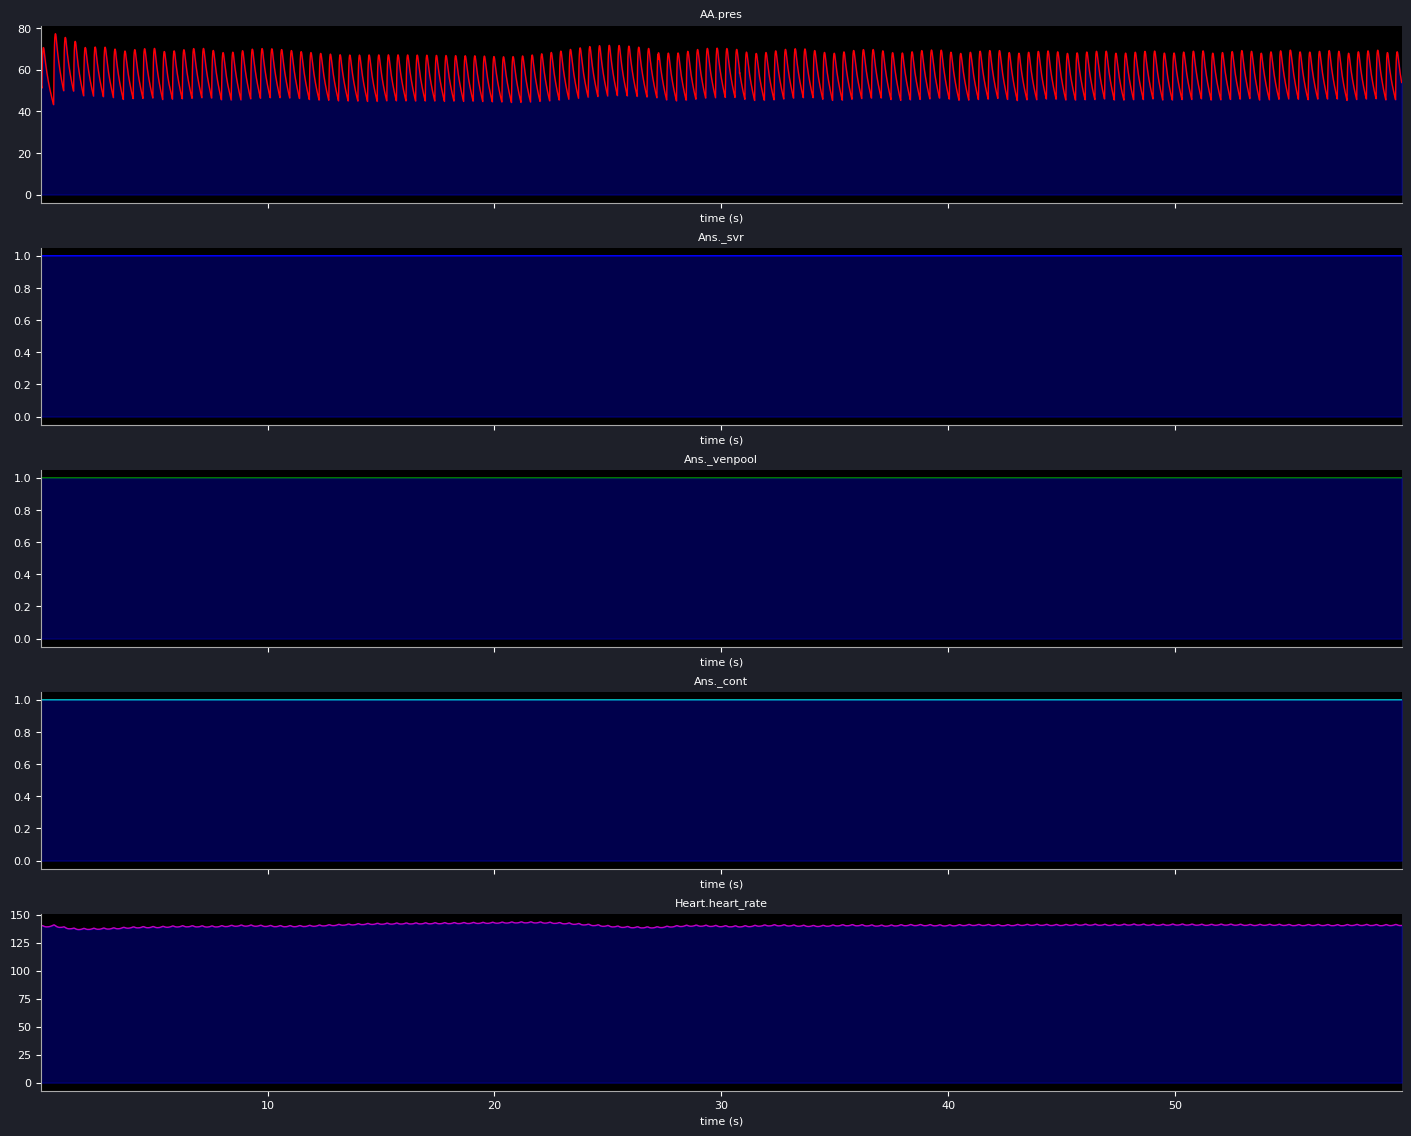


AA.pres         : max   77.22678, min   43.17457 mmHg
Ans._svr        : max        1.0 min        1.0
Ans._venpool    : max        1.0 min        1.0
Ans._cont       : max        1.0 min        1.0
Heart.heart_rate: max  143.52127 min  136.61177


In [2]:
#models["Fluids"].remove_volume(vol=40, in_time=10)
neo.plot_time_graph(["AA.pres", "Ans._svr", "Ans._venpool", "Ans._cont", "Heart.heart_rate"], combined=False, sharey=False, time_to_calculate=60, analyze=True)

Target data

Hemodynamic Studies of Induced Acute Hypo- and Hypervolemia in the Newborn Infant. Wallgren et al. Acta Pediatrica 53: 1-12 Jan. 1964


In [ ]:
neo.get_total_blood_volume()

In [ ]:
neo.plot_vitals(time_to_calculate=60)

In [ ]:
neo.ans(True)

In [ ]:
neo.analyze_heart()

In [ ]:
models["IVCE"].vol

In [3]:
neo.fastforward(120)

 Ready in 6.1 sec. Average model step in 0.0254 ms.


In [ ]:
neo.get_vitals()

In [ ]:
models['Ans']._venous_reservoirs